# Group Assignment AY 2025-2026
## Getting you started (Part 2)

This is the second notebook to get you started on the group assignment. After this, you should be able to use all the basic operations needed for the group assignment. However, don't hold back to use **external data and packages** to get additional insights for your case. Also keep in mind that you will have to present for the board of directors (i.e., management) of the organization, so **don't make your presentation too technical** (ref. storytelling)! Your code will be reviewed through your GitHub repo that you have to share with us on <a href="https://github.ugent.be/login">github.ugent.be</a>, so that is the technical part of the assignment, delivering the insights that you found should be done in the presentation.

### What to Expect in this Notebook
In this second notebook, we will:

- Let the data speak through visualizations
- Make use of packages to look for statistical support for certain statements
- Look for possible problems in the current operations and propose solutions

## Import packages and data

In [40]:
# import packages
import os
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

In [41]:
# read in all the data
facilities = pd.read_csv('./Data/facilities.csv')
incidents = pd.read_csv('./Data/incidents.csv')
satisfaction = pd.read_csv('./Data/satisfaction.csv')
stations = pd.read_csv('./Data/stations.csv')
stops = pd.read_csv('./Data/stops.csv')
subscriptions = pd.read_csv('./Data/subscriptions.csv')
tickets = pd.read_csv('./Data/tickets.csv')
travelers = pd.read_csv('./Data/travelers.csv', sep=';')

In [42]:
# import all the trips files and store them together in a single dataframe
trips_folder = './Data/Trips/'

for idx, trips_day in enumerate(os.listdir(trips_folder)):
    # get full directory
    dir = trips_folder + trips_day

    # read csv
    df = pd.read_csv(dir, sep=';')

    # add dataframes together
    if idx == 0:
        trips_df = df
    else:
        trips_df = pd.concat([trips_df, df])

# show
trips_df.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:28:54,10:28:54,10:29:00,10:29:00,-6.0,-6.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,ANDERLECHT,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
1,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:36:14,10:36:14,10:37:00,10:37:00,-46.0,-46.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,LIEDEKERKE,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
2,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:48:24,10:50:16,10:48:00,10:50:00,25.0,17.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,AALST,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
3,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:58:10,10:58:10,10:58:00,10:58:00,10.0,10.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,SERSKAMP,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
4,2025-09-27,13229,EXTRA,SNCB/NMBS,27,19:12:04,19:12:48,19:12:00,19:12:00,54.0,48.0,NaN,MORTSEL,27,2025-09-27,2025-09-27,2025-09-27,2025-09-27


## Overview

<img src="./Data/Overview_NMBS_data.png" align="center" width="800"/>

## 1. Construct Itinerary

In [43]:
# let's investigate a random train number (the first one in our dataframe: 2231)
trips_df.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:28:54,10:28:54,10:29:00,10:29:00,-6.0,-6.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,ANDERLECHT,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
1,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:36:14,10:36:14,10:37:00,10:37:00,-46.0,-46.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,LIEDEKERKE,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
2,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:48:24,10:50:16,10:48:00,10:50:00,25.0,17.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,AALST,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
3,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:58:10,10:58:10,10:58:00,10:58:00,10.0,10.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,SERSKAMP,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
4,2025-09-27,13229,EXTRA,SNCB/NMBS,27,19:12:04,19:12:48,19:12:00,19:12:00,54.0,48.0,NaN,MORTSEL,27,2025-09-27,2025-09-27,2025-09-27,2025-09-27


In [44]:
# subset for train number 2231
train_2231_df = trips_df[trips_df['Train number'] == 2231]
train_2231_df 

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:28:54,10:28:54,10:29:00,10:29:00,-6.0,-6.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,ANDERLECHT,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
1,2025-09-27,2231,IC 23-1,SNCB/NMBS,50C,10:36:14,10:36:14,10:37:00,10:37:00,-46.0,-46.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,LIEDEKERKE,50C,2025-09-27,2025-09-27,2025-09-27,2025-09-27
2,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:48:24,10:50:16,10:48:00,10:50:00,25.0,17.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,AALST,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
3,2025-09-27,2231,IC 23-1,SNCB/NMBS,50,10:58:10,10:58:10,10:58:00,10:58:00,10.0,10.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,SERSKAMP,50,2025-09-27,2025-09-27,2025-09-27,2025-09-27
2692,2025-09-27,2231,IC 23-1,SNCB/NMBS,0/2,10:10:08,10:12:38,10:09:00,10:11:00,68.0,99.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSEL-NOORD,36N,2025-09-27,2025-09-27,2025-09-27,2025-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66417,2025-09-25,2231,IC 23-1,SNCB/NMBS,0/2,10:13:05,10:13:05,10:13:00,10:13:00,5.0,5.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSEL-CONGRES,0/2,2025-09-25,2025-09-25,2025-09-25,2025-09-25
66418,2025-09-25,2231,IC 23-1,SNCB/NMBS,50,10:44:50,10:44:50,10:45:00,10:45:00,-10.0,-10.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,EREMBODEGEM,50,2025-09-25,2025-09-25,2025-09-25,2025-09-25
66419,2025-09-25,2231,IC 23-1,SNCB/NMBS,50,10:47:43,10:49:59,10:48:00,10:50:00,-16.0,-1.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,AALST,50,2025-09-25,2025-09-25,2025-09-25,2025-09-25
66420,2025-09-25,2231,IC 23-1,SNCB/NMBS,50,11:00:01,11:00:01,11:01:00,11:01:00,-59.0,-59.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,SCHELLEBELLE,50,2025-09-25,2025-09-25,2025-09-25,2025-09-25


In [45]:
# check for unique days for this train number
train_2231_df['Date of departure'].unique()

array(['2025-09-27', '2025-09-22', '2025-09-28', '2025-09-24',
       '2025-09-23', '2025-09-26', '2025-09-25'], dtype=object)

The result is subset contain 140 rows. A quick inspection tells us that this train drives **on each day of the week** (from Monday 22/09 until Sunday 28/09). So we have multiple train rides for which you can investigate the delays throughout the week. For our exercise, we want to focus on the itinerary itself: which station is preceded by which station? This is the same for each day, so we will **subset for a specific day** (here: 22/09). It results in 20 stations through which the train passes by which makes sense, given that we originally had 140 rows diveded by 7 days. As we explained in the previous notebook, the NMBS/SNCB registers the train apssing through each station including stations that are not included in the itinerary! Therefore, we filter for stops where the `Actual arrival time` = `Actual departure time` and where `Planned arrival time` = `Planned departure time` because that indicates that the train did not stop at that station. In reality, it appears that this train only makes 11 stops instead of the original 20!

In [46]:
# subset for 22/09 (NOTE: date is still in the string format; we haven't converted it yet to a more appropriate datetime format)
subset_df = train_2231_df[train_2231_df['Date of departure'] == '2025-09-22'].copy()

subset_df['Actual arrival time'] = pd.to_datetime(subset_df['Actual arrival time'], format='%H:%M:%S')
subset_df['Actual departure time'] = pd.to_datetime(subset_df['Actual departure time'], format='%H:%M:%S')
subset_df['Planned arrival time'] = pd.to_datetime(subset_df['Planned arrival time'], format='%H:%M:%S')
subset_df['Planned departure time'] = pd.to_datetime(subset_df['Planned departure time'], format='%H:%M:%S')

# only keep actual stops (see previous getting you startbook notebook)
subset_df = subset_df[~(subset_df['Actual arrival time']==subset_df['Actual departure time'])]
subset_df = subset_df[~(subset_df['Planned arrival time']==subset_df['Planned departure time'])]

# order based on planned departure time
subset_df = subset_df.sort_values('Planned departure time')
subset_df.shape

(11, 18)

In [47]:
# where does the train make a stop
subset_df

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
55563,2025-09-22,2231,IC 23-1,SNCB/NMBS,36C,NaT,1900-01-01 09:57:32,NaT,1900-01-01 09:57:00,NaN,32.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSELS AIRPORT - ZAVENTEM,NaN,NaN,2025-09-22,NaN,2025-09-22
55569,2025-09-22,2231,IC 23-1,SNCB/NMBS,0/2,1900-01-01 10:09:12,1900-01-01 10:11:10,1900-01-01 10:08:00,1900-01-01 10:11:00,73.0,11.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSEL-NOORD,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
45485,2025-09-22,2231,IC 23-1,SNCB/NMBS,0/2,1900-01-01 10:15:11,1900-01-01 10:16:43,1900-01-01 10:15:00,1900-01-01 10:16:00,11.0,43.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSEL-CENTRAAL,0/2,2025-09-22,2025-09-22,2025-09-22,2025-09-22
19081,2025-09-22,2231,IC 23-1,SNCB/NMBS,50A,1900-01-01 10:20:04,1900-01-01 10:24:12,1900-01-01 10:20:00,1900-01-01 10:24:00,5.0,12.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,BRUSSEL-ZUID,0/2,2025-09-22,2025-09-22,2025-09-22,2025-09-22
19084,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 10:42:49,1900-01-01 10:44:40,1900-01-01 10:39:00,1900-01-01 10:42:00,230.0,161.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,DENDERLEEUW,50C,2025-09-22,2025-09-22,2025-09-22,2025-09-22
19090,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 10:50:22,1900-01-01 10:51:49,1900-01-01 10:48:00,1900-01-01 10:50:00,143.0,109.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,AALST,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
45491,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 10:55:56,1900-01-01 10:57:03,1900-01-01 10:55:00,1900-01-01 10:56:00,57.0,64.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,LEDE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
45497,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 11:03:37,1900-01-01 11:04:52,1900-01-01 11:03:00,1900-01-01 11:04:00,38.0,53.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,WETTEREN,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
55584,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 11:09:37,1900-01-01 11:10:47,1900-01-01 11:09:00,1900-01-01 11:10:00,37.0,47.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,MELLE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22
55587,2025-09-22,2231,IC 23-1,SNCB/NMBS,50,1900-01-01 11:13:47,1900-01-01 11:15:28,1900-01-01 11:13:00,1900-01-01 11:14:00,48.0,88.0,IC 23-1: BRUSSELS AIRPORT - ZAVENTEM -> GENT-S...,MERELBEKE,50,2025-09-22,2025-09-22,2025-09-22,2025-09-22


The filtering is important so for the link between trips and the tickets dataset, because you have to exclude 'fake' station, since the train doesn't stop there and it can corrupt the itinerary. However, you don't necessarily have to perform the filtering in the case for plotting the itinerary on a map, because that will give you a unique and exact route on the rail network. Otherwise there might be some ambiguity between different possible routes (or track lines) being used. Let's investigate whether only including the actual stops (excluign the fake stops) gives us the result that we are looking for.

To **visualize this specific route on a map**, we'll make use of a *chloropleth map* of Belgium. Let's first filter exclusively for train stations in Belgium using the `country-code`.

In [48]:
# only filter for Belgian stations
stations = stations[stations['country-code']=='be']
stations

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
5,8891140,Aalter,NaN,NaN,NaN,NaN,be,3.447848,51.092295,188.276119,240.0
6,8833209,Aarschot,NaN,NaN,NaN,NaN,be,4.824043,50.984406,171.664179,240.0
7,8892288,Aarsele,NaN,NaN,NaN,NaN,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
672,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


The stop name in the stations dataframe is mainly lower case while stop name in the trips dataframe is upper case. So the stop names in both datasets should be converted to **upper case** so that we can match both datasets by the name of the station. **NOTE**: in the uppercase version of the trips data, we notice the absence of accents on the characters so we'll also deal with that using a specialized user-defined function.

In [49]:
import unicodedata

# define function to convert to uppercase characters without aaccents
def remove_accents_and_uppercase(input_str):
    nkfd_form = unicodedata.normalize('NFKD', str(input_str))
    return u"".join([c.upper() for c in nkfd_form if not unicodedata.combining(c)])

In [50]:
# apply this on all the station name columns used in the stations dataset
stations['name'] = stations['name'].apply(remove_accents_and_uppercase)
stations['alternative-fr'] = stations['alternative-fr'].apply(remove_accents_and_uppercase)
stations['alternative-nl'] = stations['alternative-nl'].apply(remove_accents_and_uppercase)
stations['alternative-de'] = stations['alternative-de'].apply(remove_accents_and_uppercase)
stations['alternative-en'] = stations['alternative-en'].apply(remove_accents_and_uppercase)

# show
stations

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,8895000,AALST,ALOST,NAN,NAN,NAN,be,4.039653,50.942813,157.425373,300.0
4,8895125,AALST-KERREBROEK,ALOST KERREBROEK,NAN,NAN,NAN,be,4.024407,50.948377,7.731343,300.0
5,8891140,AALTER,NAN,NAN,NAN,NAN,be,3.447848,51.092295,188.276119,240.0
6,8833209,AARSCHOT,NAN,NAN,NAN,NAN,be,4.824043,50.984406,171.664179,240.0
7,8892288,AARSELE,NAN,NAN,NAN,NAN,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,ZONHOVEN,NAN,NAN,NAN,NAN,be,5.348815,50.989557,30.910448,300.0
671,8895208,ZOTTEGEM,NAN,NAN,NAN,NAN,be,3.814410,50.869102,161.223881,240.0
672,8891611,ZWANKENDAMME,NAN,NAN,NAN,NAN,be,3.191557,51.306409,0.000000,NaN
673,8894821,ZWIJNDRECHT,NAN,NAN,NAN,NAN,be,4.329780,51.214108,150.514925,300.0


In [51]:
# compare to the itinerary of train number 2231
subset_df[['Stopping place']]

,Stopping place
55563,BRUSSELS AIRPORT - ZAVENTEM
55569,BRUSSEL-NOORD
45485,BRUSSEL-CENTRAAL
19081,BRUSSEL-ZUID
19084,DENDERLEEUW
19090,AALST
45491,LEDE
45497,WETTEREN
55584,MELLE
55587,MERELBEKE


In [52]:
# show stations containing 'BRUS' --> Both Dutch and French names included!
stations[stations['name'].str.contains('BRUS')]

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
112,8813003,BRUSSEL-CENTRAAL/BRUXELLES-CENTRAL,BRUXELLES-CENTRAL,BRUSSEL-CENTRAAL,NAN,BRUSSELS-CENTRAL,be,4.356801,50.845658,970.149254,300.0
113,8813045,BRUSSEL-CONGRES/BRUXELLES-CONGRES,BRUXELLES-CONGRES,BRUSSEL-CONGRES,NAN,BRUSSELS-CONGRES,be,4.362051,50.852067,970.149254,300.0
114,8813037,BRUSSEL-KAPELLEKERK/BRUXELLES-CHAPELLE,BRUXELLES-CHAPELLE,BRUSSEL-KAPELLEKERK,NAN,BRUSSELS-CHAPELLE/BRUSSELS-KAPELLEKERK,be,4.347866,50.841127,970.149254,300.0
115,8811304,BRUSSEL-LUXEMBURG/BRUXELLES-LUXEMBOURG,BRUXELLES-LUXEMBOURG,BRUSSEL-LUXEMBURG,NAN,BRUSSELS-LUXEMBURG/BRUSSELS-LUXEMBOURG,be,4.373674,50.838943,287.134328,300.0
116,8812005,BRUSSEL-NOORD/BRUXELLES-NORD,BRUXELLES-NORD,BRUSSEL-NOORD,NAN,BRUSSELS-NORTH,be,4.360846,50.859663,977.910448,300.0
117,8811916,BRUSSEL-SCHUMAN/BRUXELLES-SCHUMAN,BRUXELLES-SCHUMAN,BRUSSEL-SCHUMAN,NAN,BRUSSELS-SCHUMAN,be,4.380722,50.843276,286.582090,300.0
118,8815040,BRUSSEL-WEST/BRUXELLES-OUEST,BRUXELLES-OUEST,BRUSSEL-WEST,NAN,BRUSSELS-WEST,be,4.321042,50.848552,37.447761,300.0
119,8814001,BRUSSEL-ZUID/BRUXELLES-MIDI,BRUXELLES-MIDI,BRUSSEL-ZUID,NAN,BRUSSELS-SOUTH/BRUSSELS-MIDI,be,4.336531,50.835707,1040.664179,300.0
120,8819406,BRUSSELS AIRPORT - ZAVENTEM,NAN,NAN,NAN,NAN,be,4.482076,50.896456,316.970149,3540.0


Let's now merge both dataframes together (i.e. trip 2231 and the corresponding station information) so that we have the corresponding location (`longitude` and `latitude`) of each stop on the trip. To do so, we'll make use of a two-step merging process. The reason for this being the fact that the `Stopping place` from the trips dataset is in Dutch (which is not always the case for the corresponding `name`in the stations dataset as shown for stations containing 'BRUS' above). Therefore, we will first merge our trips dataset on the `name` column from the stations dataframe and if we don't find a match we will fall back on the `alterantive-nl` column instead.

In [53]:
# merge both dataframes (trip 2231 and corresponding station information)

# first merge on 'name'
merged_df = subset_df.merge(
    stations[['name', 'longitude', 'latitude']],
    left_on="Stopping place",
    right_on="name",
    how="left"
)[['Stopping place', 'longitude', 'latitude', 'Actual arrival time', 'Actual departure time']]

# second merge on 'alternative-nl'
alt_merge = subset_df.merge(
    stations[['alternative-nl', 'longitude', 'latitude']],
    left_on="Stopping place",
    right_on="alternative-nl",
    how="left"
)[['longitude', 'latitude', 'Actual arrival time', 'Actual departure time']]

# fill missing values in first merge using results found using the second merge
merged_df['longitude'] = merged_df['longitude'].fillna(alt_merge['longitude'])
merged_df['latitude'] = merged_df['latitude'].fillna(alt_merge['latitude'])

# show
merged_df

,Stopping place,longitude,latitude,Actual arrival time,Actual departure time
0,BRUSSELS AIRPORT - ZAVENTEM,4.482076,50.896456,NaT,1900-01-01 09:57:32
1,BRUSSEL-NOORD,4.360846,50.859663,1900-01-01 10:09:12,1900-01-01 10:11:10
2,BRUSSEL-CENTRAAL,4.356801,50.845658,1900-01-01 10:15:11,1900-01-01 10:16:43
3,BRUSSEL-ZUID,4.336531,50.835707,1900-01-01 10:20:04,1900-01-01 10:24:12
4,DENDERLEEUW,4.071825,50.891925,1900-01-01 10:42:49,1900-01-01 10:44:40
5,AALST,4.039653,50.942813,1900-01-01 10:50:22,1900-01-01 10:51:49
6,LEDE,3.984981,50.970895,1900-01-01 10:55:56,1900-01-01 10:57:03
7,WETTEREN,3.881883,51.001603,1900-01-01 11:03:37,1900-01-01 11:04:52
8,MELLE,3.797088,51.002807,1900-01-01 11:09:37,1900-01-01 11:10:47
9,MERELBEKE,3.768889,51.017531,1900-01-01 11:13:47,1900-01-01 11:15:28


Now that we have the `longitude` and `latitude` for each subsequent station, we can plot it on a **scatter plot**. More specifically, if we loop through the trips of a certain train, 
we can extract the station of the current observation and treat it as the start of the trip. The station of the subsequent observation is than treated as the end of the trip.
This can then be **plotted as a line** with the **x-coordinates being the longitude** of the start and stop and the **y-coordinates being the latitude** of the start and stop.

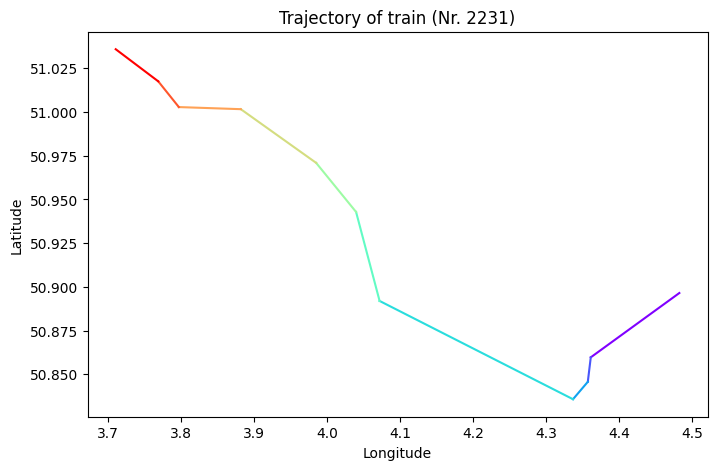

In [54]:
# import built-in colormaps from matplotlib
from matplotlib.pyplot import cm

# intitialize plot
plt.figure(figsize=(8, 5))
# let's use the rainbow colormap over the trajectory
color = iter(cm.rainbow(np.linspace(0, 1, len(merged_df) - 1)))

# loop through all the observations of sorted train trips 
# except for the last observation, because this observation is only a stop and not a start
for i in range(len(merged_df) - 1):
        
    # get longitude and latitude of the start (=current observation)
    lon_start = merged_df["longitude"].iloc[i]
    lat_start = merged_df["latitude"].iloc[i]
    
    # get longitude and latitude of the stop (=next observation)
    lon_end = merged_df["longitude"].iloc[i+1]
    lat_end = merged_df["latitude"].iloc[i+1]
    
    # plot line with with the x-coordinates being the longitude of the start and stop
    # and the y-coordinates being the latitude of the start and stop.
    plt.plot([lon_start, lon_end], [lat_start, lat_end], color=next(color))

# show plot
plt.title("Trajectory of train (Nr. 2231)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Geospatial data

If you want to plot this **trajectory on the map of Belgium** using a choropleth map, you can make use of the `geopandas` package which we will explain in a brief intermezzo below:

In [55]:
# import package (once you have installed it via pip3 or conda)
import geopandas as gpd

## Intermezzo: GeoPandas

### Geospatial data

If you want to use geospatial data in your visualization, like plotting the **train trajectory on the map of Belgium** you'll use a **choropleth map** by making use of the `geopandas` package.

To apply this methodology, you need to download some geospatial data in either a shapefile (.shp) or geojson (.json) data format. I downloaded a map of the Belgian provinces from <a href="https://hub.arcgis.com/datasets/esribeluxdata::belgium-provinces-1/explore?location=50.489349%2C4.476903%2C8.44">here</a>. Be aware when suing the Belgian municipalities, there were some mergers on 1 January 2025. However, the relevance of having the most up-to-date map heavily relies on your use case or the story you want to bring with your visual. As mentioned, we'll be using a map of the **Belgian provinces**.

In [56]:
# read in file in geopandas data structure
provinces_df = gpd.read_file('./BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp').to_crs(epsg=4326)

# show
provinces_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


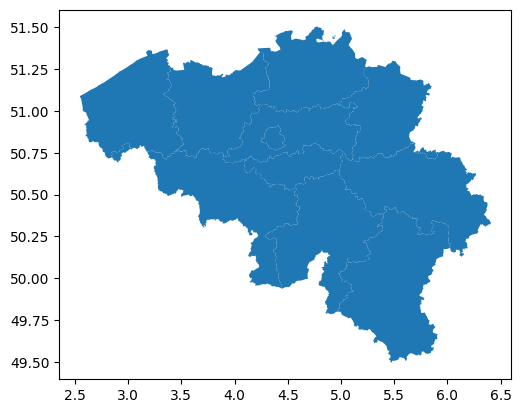

In [57]:
# show
provinces_df.plot()
plt.show()

Of course, an empty map isn't our end goal. We want to link information to this visualization. As an example, I will use self-retrieved data on the number of inhabitants per province. For the group assignment, you will need to look for various useful data sources on the internet. You can either use data from a source where you find it (like I will do now) or entire tables (e.g. from the Infrabel open data website), but don't forget to mention your source (i.e., **transparancy**)! 

In [58]:
# check unique province names in provinces_df
provinces_df["NE_Name"].unique()

array(['Antwerpen', 'Brussel', 'Vlaams Brabant', 'Waals Brabant',
       'West-Vlaanderen', 'Oost-Vlaanderen', 'Henegouwen', 'Luik',
       'Limburg', 'Luxemburg', 'Namen'], dtype=object)

Let's retrieve some useful data from the internet. I downloaded data regarding the inhabitant per province in belgium on the 1st of january 2024 via statbel (https://statbel.fgov.be/en/news/1-january-2024-belgium-had-11763650-inhabitants). I saved the retrieved data in an excel file called inhabitants_prov_2024.xlsx

In [59]:
# load self created excel file regarding inhabitant data (source: statbel)
inh_df = pd.read_excel('./inhabitants_prov_2024.xlsx')

# show
inh_df.head()

,Province,Inhabitants
0,Antwerpen,1926522
1,Brussel,1249597
2,Limburg,900098
3,West-Vlaanderen,1226375
4,Vlaams Brabant,1196773


In [60]:
# change column to the same name and then merge both tables
inh_df = inh_df.rename(index=str, columns={'Province': 'NE_Name'})

In [61]:
# merge
provinces_df = provinces_df.merge(inh_df, on='NE_Name')

# show
provinces_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,Inhabitants
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",1926522
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",1249597
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",1196773
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",414130
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",1226375


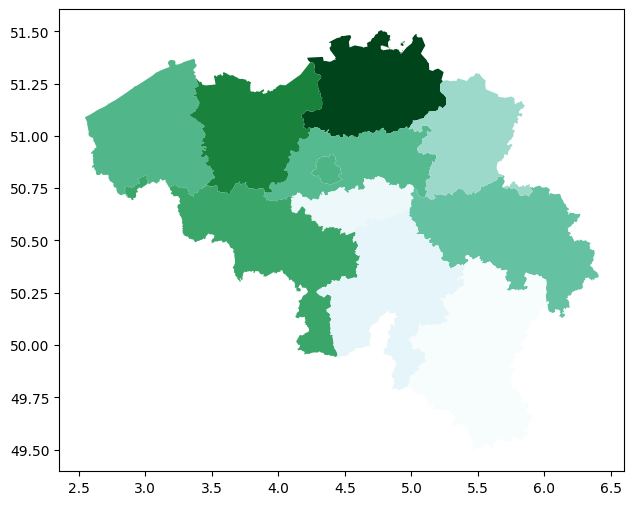

In [62]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# use cmap = 'BuGn' to get nice color-shaded plot
provinces_df.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax=ax)
plt.show()

Pretty easy right? Enjoy trying out different things as well as checking out the other .shp/.json files provided on the URL I posted somewhere above here.

What is also useful is matplotlib **layer-by-layer information**. As most geospatial data is structured in lat-lon format you can just plot various geographic representations on each other. To show this, I will be plotting some large Belgian universities on our map.

In [63]:
# dictionary with location of Belgian universities
data = {'Name':  ['Ugent', 'KULeuven', 'VUB'],
        'lat': [51.046672, 50.877833, 50.822476],
        'lon': [3.727708, 4.700250, 4.394807]}

# create data frame
data_df = pd.DataFrame(data, columns = ['Name', 'lat', 'lon'])
data_df

,Name,lat,lon
0,Ugent,51.046672,3.727708
1,KULeuven,50.877833,4.700250
2,VUB,50.822476,4.394807


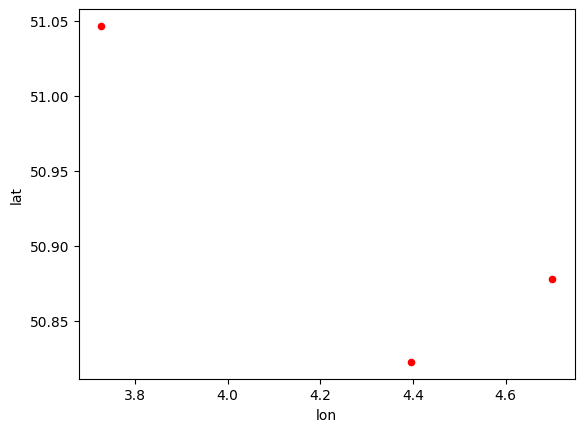

In [64]:
# scatter plot
data_df.plot('lon', 'lat', 'scatter',  color='red')
plt.show()

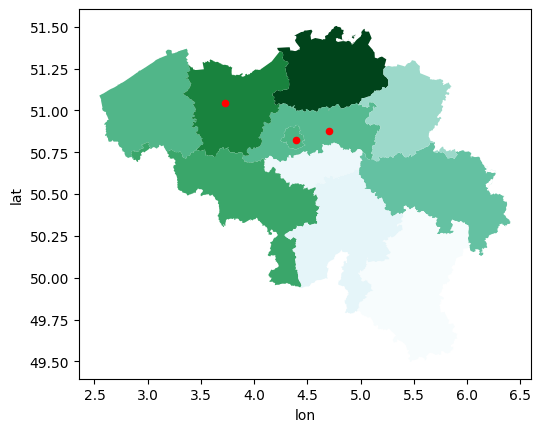

In [65]:
# overlap with our map
ax = data_df.plot('lon', 'lat', 'scatter',  color='red', zorder=2)
provinces_df.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax = ax, zorder = 1)
plt.show()

## Visualize an Itinerary on the map

Enough about geopandas for now. If you want to learn more about it you can have a look at the documentation online via: https://geopandas.org/en/stable/index.html. Let's now plot the itinerary of our train ride (from Train number 2231), given that our previous attempt resulted in a very abstract line chart.

I downloaded a map of Belgian Municipalities from the following link on GitHub: https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/data/belgium.json. Note: This file contains **multiple layers** of Belgium: 'municipalities', 'arrondissements', and 'provinces'. We'll select the municipalities layer because then we can check whether the different stops on the itinerary are indeed in the correct municipality. However, feel free to look on the internet for other files.

In [66]:
# read in file in geopandas data structure
map_df = gpd.read_file('./belgium.json', layer='municipalities')

#show
map_df.head()

,id,reg_nis,reg_nl,reg_fr,nis,name_fr,name_nl,prov_nis,prov_fr,prov_nl,arr_nis,arr_fr,arr_nl,population,geometry
0,None,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,21001,Anderlecht,Anderlecht,None,None,None,21000,Arrondissement de Bruxelles-Capitale,Arrondissement Brussel Hoofdstad,120887,"POLYGON ((4.27935 50.80907, 4.27666 50.80927, ..."
1,None,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,21004,Bruxelles,Brussel,None,None,None,21000,Arrondissement de Bruxelles-Capitale,Arrondissement Brussel Hoofdstad,185103,"POLYGON ((4.33561 50.84659, 4.33677 50.84719, ..."
2,None,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,21009,Ixelles,Elsene,None,None,None,21000,Arrondissement de Bruxelles-Capitale,Arrondissement Brussel Hoofdstad,87632,"MULTIPOLYGON (((4.39418 50.81489, 4.39303 50.8..."
3,None,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,21005,Etterbeek,Etterbeek,None,None,None,21000,Arrondissement de Bruxelles-Capitale,Arrondissement Brussel Hoofdstad,48473,"POLYGON ((4.40613 50.83776, 4.40574 50.83475, ..."
4,None,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,21006,Evere,Evere,None,None,None,21000,Arrondissement de Bruxelles-Capitale,Arrondissement Brussel Hoofdstad,42656,"POLYGON ((4.42385 50.86124, 4.4227 50.85924, 4..."


In addition to the base layer of our municipalities map, I would also like to add the Infrabel railway infrastructure (i.e. line sections). I retrieved this data via the **Infabel open data platform**: https://infrabel.opendatasoft.com/explore/dataset/lijnsecties/export/?disjunctive.label&disjunctive.ecs_voltfreq&disjunctive.ecs_maxtraincurrent&disjunctive.ecs_maxstandstillcurrent&disjunctive.ecs_minwireheight&disjunctive.ls_id&location=8,50.51624,4.35608&basemap=jawg.streets. In this way, I can visually check whether my train itinerary follows along an actual line section or not!

In [67]:
# read in file in geopandas data structure
railways_df = gpd.read_file('./lijnsecties/lijnsecties.shp')

#show
railways_df.head()

,ls_id,label,ptcarfrom,ptcarfromna,ptcarto,ptcartoname,mfrom,mto,ecs_voltfre,ecs_maxtrai,ecs_maxstan,ecs_minwire,nrtracks,c400,c70,p70,p400,symnamefrom,symnameto,geometry
0,1934,50A,220,BRUXELL-MIDI,226,BRUXELLES-PI,244,2294,3kV DC,2400,200,4.8,2,400,70,70,400,FBMZ,FBKI,"LINESTRING (4.33605 50.8358, 4.33583 50.83535,..."
1,2079,132,961,PHILIPPEVILL,2199,PHILIPPE642,99450,99900,Not Electrified,None,None,NaN,1,400,70,70,400,GPL,PL642,"LINESTRING (4.53605 50.19161, 4.53476 50.18976..."
2,741,96,902,NEUFVILLES,1553,Y.JURBISE,41164,46400,3kV DC,2400,200,4.8,2,400,70,70,400,FFV,YFJR,"LINESTRING (4.01076 50.54352, 4.00981 50.543, ..."
3,982,96,504,HALLE,706,LEMBEEK,13280,16000,3kV DC,4000,200,4.8,2,400,70,70,400,FH,FLB,"LINESTRING (4.23982 50.73306, 4.2361 50.73004,..."
4,1798,52L/3,1996,V.VERBEKE,547,INR.VERBEKE,42000,42150,Not Electrified,0,None,NaN,1,400,70,70,400,VVRBK,RVRBK,"LINESTRING (4.34295 51.15237, 4.34303 51.15263..."


<Figure size 6000x9000 with 0 Axes>

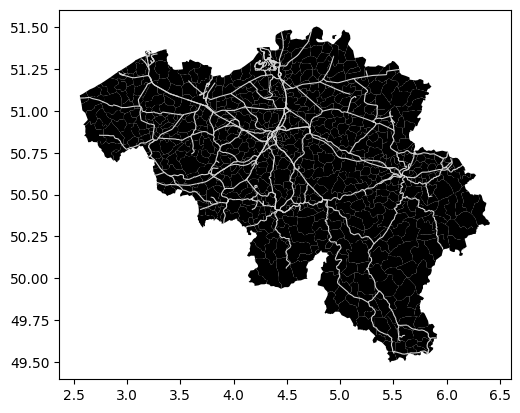

In [68]:
# plot line sections on map of Belgian municipalities
plt.figure(figsize=(10,15), dpi=600)
ax = map_df.plot(color='black', linewidth=0.5, zorder=1)
railways_df.plot(color='lightgrey', linewidth=0.8, ax=ax, zorder=2)
plt.show()

Great! Let's now add the itinerary of our train ride (train number 2231: BRU AIRPORT - ZAVENTEM --> GENT-SINT-PIETERS) to our plot with the railway infrastructure. We can now visually inspect whether each stop is in the correct municipality on the map.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 6000x9000 with 0 Axes>

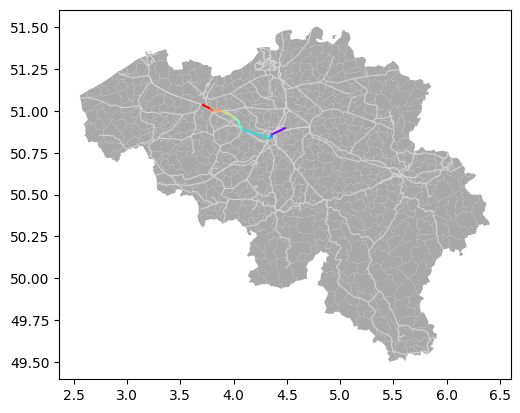

In [69]:
plt.figure(figsize=(10,15), dpi=600)
ax = map_df.plot(color='darkgrey', linewidth=0.5, zorder=1)
railways_df.plot(color='lightgrey', linewidth=0.8, ax=ax, zorder=2)

# let's use the rainbow colormap over the trajectory
color = iter(cm.rainbow(np.linspace(0, 1, len(merged_df) - 1)))

# loop through all the observations of sorted train trips 
# except for the last observation, because this observation is only a stop and not a start
for i in range(len(merged_df) - 1):
        
    # get longitude and latitude of the start (=current observation)
    lon_start = merged_df["longitude"].iloc[i]
    lat_start = merged_df["latitude"].iloc[i]
    
    # get longitude and latitude of the stop (=next observation)
    lon_end = merged_df["longitude"].iloc[i+1]
    lat_end = merged_df["latitude"].iloc[i+1]
    
    # plot line with with the x-coordinates being the longitude of the start and stop
    # and the y-coordinates being the latitude of the start and stop on top of the first layer
    plt.plot([lon_start, lon_end], [lat_start, lat_end], color=next(color), zorder=2)

plt.show

The line sections of our trip are nicely segmented between each stop to a respective color from our colormap. The train does indeed start in Zaventem and goes to Brussels, to then pass over Aalst on its way to Ghent.

### 2. Satisfaction

Let's assume you want to visualize how the number of facilities is distributed across the various stations.

In [70]:
# inspect
facilities.head(5)

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,8734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,8895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00


In [71]:
# check all column names
facilities.columns

Index(['station_id', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday'],
      dtype='object')

In [72]:
# create list of facility columns
facil_col = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
             'bus', 'tram', 'metro', 'wheelchair_available', 'ramp', 'disabled_parking_spots', 'elevated_platform', 
             'escalator_up', 'escalator_down', 'elevator_platform', 'audio_induction_loop']

In [73]:
# for the sake of this exercise, we will simply impute all missing values of the facilities with zero
for col in facil_col:
    facilities[col].fillna((0), inplace=True)

# check if it worked    
for col in facilities.columns:
    missings = len(facilities[col][facilities[col].isnull()]) / float(len(facilities))
    print(col, missings)

station_id 0.0
name 0.0
street 0.17210682492581603
zip 0.17359050445103857
city 0.17359050445103857
ticket_vending_machine 0.0
luggage_lockers 0.0
free_parking 0.0
taxi 0.0
bicycle_spots 0.0
blue-bike 0.0
bus 0.0
tram 0.0
metro 0.0
wheelchair_available 0.0
ramp 0.0
disabled_parking_spots 0.0
elevated_platform 0.0
escalator_up 0.0
escalator_down 0.0
elevator_platform 0.0
audio_induction_loop 0.0
sales_open_monday 0.7997032640949555
sales_close_monday 0.7997032640949555
sales_open_tuesday 0.7997032640949555
sales_close_tuesday 0.7997032640949555
sales_open_wednesday 0.7997032640949555
sales_close_wednesday 0.7997032640949555
sales_open_thursday 0.7997032640949555
sales_close_thursday 0.7997032640949555
sales_open_friday 0.7997032640949555
sales_close_friday 0.7997032640949555
sales_open_saturday 0.8738872403560831
sales_close_saturday 0.8738872403560831
sales_open_sunday 0.8961424332344213
sales_close_sunday 0.8961424332344213


/var/folders/_j/mmd2ctmd2g3fdbmykf428gn80000gn/T/ipykernel_6845/1443874073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facilities[col].fillna((0), inplace=True)


In [74]:
# check frequency of each unique value of disabled_parking_spots
facilities["disabled_parking_spots"].value_counts()

disabled_parking_spots
0.0     462
2.0      77
1.0      43
3.0      36
4.0      28
5.0      10
7.0       5
6.0       4
13.0      2
8.0       2
10.0      2
24.0      1
9.0       1
12.0      1
Name: count, dtype: int64

In [75]:
# PROBLEM: disabled_parking_spots is the number of spots instead of a dummy indicator
# so let's create a dummy variable
facilities['disabled_parking_spots_indicator'] = np.where(facilities['disabled_parking_spots']==0, 0, 1)

In [76]:
# drop old variable and add new name to our list
facil_col.remove('disabled_parking_spots')
facil_col = facil_col + ['disabled_parking_spots_indicator']

In [77]:
# show
facil_col

['ticket_vending_machine',
 'luggage_lockers',
 'free_parking',
 'taxi',
 'bicycle_spots',
 'blue-bike',
 'bus',
 'tram',
 'metro',
 'wheelchair_available',
 'ramp',
 'elevated_platform',
 'escalator_up',
 'escalator_down',
 'elevator_platform',
 'audio_induction_loop',
 'disabled_parking_spots_indicator']

In [78]:
# show columns of interest
facilities[facil_col]

,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,blue-bike,bus,tram,metro,wheelchair_available,ramp,elevated_platform,escalator_up,escalator_down,elevator_platform,audio_induction_loop,disabled_parking_spots_indicator
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
670,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
672,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [79]:
# compute total number of facilities per station
facilities['number_facilities'] = facilities[facil_col].sum(axis = 1)

In [80]:
# show
facilities['number_facilities'] 

0       0.0
1       0.0
2      12.0
3       1.0
4       7.0
       ... 
669     3.0
670     8.0
671     0.0
672     3.0
673     4.0
Name: number_facilities, Length: 674, dtype: float64

In [81]:
# number of possible facilities
len(facil_col)

17

In [82]:
# prepare data for number of facilities in different stations
input_plot = pd.DataFrame(facilities['number_facilities'].value_counts())

In [83]:
# show
input_plot

,count
number_facilities,
0.0,141
2.0,112
3.0,94
1.0,84
4.0,50
6.0,42
5.0,40
8.0,31
7.0,29


In [84]:
# prepare dataset as input for pyplot
input_plot['number_facilities'] = input_plot.index
input_plot = input_plot.rename(index=str, columns={'count': 'frequency'})

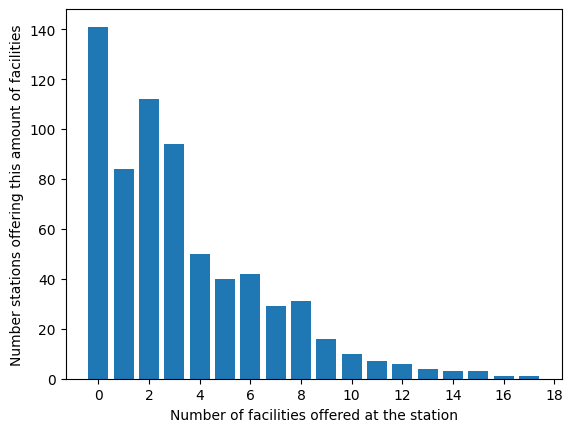

In [85]:
# time to get plotting
fig, ax = plt.subplots()
plt.bar(input_plot['number_facilities'], input_plot['frequency'])
plt.locator_params(axis='x', nbins=len(input_plot))
plt.xlabel('Number of facilities offered at the station')
plt.ylabel('Number stations offering this amount of facilities')
plt.show()

While this is a very simple plot, it already gives some useful information. It seems that a lot of stations offer between 0 and 3 facilties. Others offer an intermediate amount between 4 and 8. A limited amount of stations offers 9 and above facilities. This could be useful for grouping together stations. This could result in you using 2 categorical variables instead of 17 when you expect the relationship between a dependent and number of facilities to be non-linear.

### 3. Travelers

Let's build on top of the notebook from last week (**GettingYouStartedPt1**) and try to mathematically proof whether weekly commute numbers are linked to the availabilty of certain facilities, like free parking and the presence of a tram stations.

In [86]:
# inspect two facilities 
facilities[['tram', 'free_parking']]

,tram,free_parking
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
669,0.0,1.0
670,0.0,1.0
671,0.0,0.0
672,0.0,1.0


In [87]:
# check shape of facilities df
print(facilities.shape)

# check shape of travelers df
print(travelers.shape)

(674, 38)
(553, 5)


In [88]:
# remove accents and put in upper case
facilities['name'] = facilities['name'].apply(remove_accents_and_uppercase)

In [89]:
# check overlap
len(list(set(facilities['name']).intersection(set(travelers['Station']))))

504

In [90]:
# around 50 stations still need manual imputation
# let's check which ones
intersection = list(set(facilities['name']).intersection(set(travelers['Station'])))

# non-overlap with travelers data
still_needed = set(travelers['Station']).difference(intersection)

In [91]:
len(still_needed)

49

In [92]:
still_needed

{'ANTWERPEN-CAAL',
 'ARCADES',
 'BERCHEM-ST-AG.-BERCHEM',
 'BOITSFORT/BOSVOORDE',
 'BOONDAEL/BOONDAAL',
 "BRAINE-l'ALLEUD",
 'BRU. AIRPORT - ZAVENTEM',
 'BRU.-CENT.',
 'BRU.-CHAP./KAP.',
 'BRU.-CONG.',
 'BRU.-LUXEMBG',
 'BRU.-MIDI/ZUID',
 'BRU.-NOORD/NORD',
 'BRU.-SCHUMAN',
 'BRU.-WEST/OUEST',
 'COMINES/KOMEN',
 'ENGHIEN/EDINGEN',
 'ERBISOEUL',
 'FEXHE-LE-HT-CLOCHER',
 'FOREST-EST/VORST-OOST',
 'FOREST-MIDI/VORST-ZUID',
 'GERMOIR/MOUTERIJ',
 'HAREN-ZUID/SUD',
 'JURBISE',
 'LA ROCHE',
 'LESSINES',
 'MORTSEL-OUDE-GOD',
 'MOUSCRON/MOESKROEN',
 'PAPIGNIES',
 'RONSE/RENAIX',
 'RUISBR.-SAUVEGARDE',
 'ST-DENIJS-BOEKEL',
 'ST-DENIS-BOVESSE',
 'ST-GEN-RODE/RHODE-ST-GEN',
 'ST-GHISLAIN',
 'ST-GILLIS',
 'ST-JOB',
 'ST-JORIS-WEERT',
 'ST-KATELIJNE-WAVER',
 'ST-MARIABURG',
 'ST-MARTENS-BODEGEM',
 'ST-NIKLAAS',
 'ST-TRUIDEN',
 'TOUR ET TAXIS/THURN EN TAXIS',
 'UCCLE/UKKEL-CALEVOET',
 'UCCLE/UKKEL-STALLE',
 'VILLE-POMMEROEUL',
 "VIVIER D'OIE/DIESDELLE",
 'WATERMAEL/WATERMAAL'}

In [93]:
# non-overlap with facilities data
facility_names = set(facilities['name']).difference(intersection)

In [94]:
# show
facility_names

{'AACHEN HBF',
 'AEROPORT CHARLES-DE-GAULLE TGV',
 'AGDE',
 'AIME-LA-PLAGNE',
 'AIX-EN-PROVENCE TGV',
 'ALBERTVILLE',
 'AMSTERDAM CS',
 'ANNAPPES',
 'ANTIBES',
 'ANTWERPEN-CENTRAAL',
 'ANTWERPEN-DAM',
 'ANTWERPEN-HAVEN',
 'ANTWERPEN-OOST',
 'ARCADEN/ARCADES',
 'ARRAS',
 'ASCQ',
 'ATHUS-FRONTIERE',
 'AUBANGE-FRONTIERE-LUXEMBOURG',
 'AULNOYE-AYMERIES',
 'AVIGNON TGV',
 'BAISIEUX',
 'BASEL',
 'BASTOGNE-NORD',
 'BASTOGNE-SUD',
 'BERTRANGE STRASSEN',
 'BEZIERS',
 'BLANDAIN-FRONTIERE',
 'BOONDAAL/BOONDAEL',
 'BOSVOORDE/BOITSFORT',
 'BOURG-SAINT-MAURICE',
 "BRAINE-L'ALLEUD",
 'BREDA',
 'BRUSSEL-CENTRAAL/BRUXELLES-CENTRAL',
 'BRUSSEL-CONGRES/BRUXELLES-CONGRES',
 'BRUSSEL-KAPELLEKERK/BRUXELLES-CHAPELLE',
 'BRUSSEL-LUXEMBURG/BRUXELLES-LUXEMBOURG',
 'BRUSSEL-NOORD/BRUXELLES-NORD',
 'BRUSSEL-SCHUMAN/BRUXELLES-SCHUMAN',
 'BRUSSEL-WEST/BRUXELLES-OUEST',
 'BRUSSEL-ZUID/BRUXELLES-MIDI',
 'BRUSSELS AIRPORT - ZAVENTEM',
 'CANNES',
 'CAPELLEN',
 'CHAMBERY-CHALLES-LES-EAUX',
 'CLERVAUX',
 'COLMAR',
 'COMI

The facilities dateset also includes international stations, more small stations and different names for the stations with bilingual names or more complicated names. We will have to impute these manually. I will do some, but you will have to create a dictionary of all linked names in order to impute those names.

In [95]:
# dictionary with correct names
Dict = dict({'ANTWERPEN-CAAL': 'ANTWERPEN-CENTRAAL',
             'ARCADES': 'ARCADEN/ARCADES',
             'BERCHEM-ST-AG.-BERCHEM': 'SINT-AGATHA-BERCHEM/BERCHEM-SAINTE-AGATHE'}) 

In [96]:
# replace names in
travelers = travelers.replace({"Station": Dict})

In [97]:
# check if overlap +4 (previously overlap = 473)
len(list(set(facilities['name']).intersection(set(travelers['Station']))))

507

Overlap has increased by three. These are the three stations I have mapped out.

Let's **assume we have imputed all station names**. Now we can merge the two datasets and run an analysis to see whether tram and free parking availability correlate to the number of travelers on a weekday. Do note that the relationship can be bi-directional. People can be inclined to use stations with connection to trams, but public transport companies can also be more likely to link their network with popular train stations.

In [98]:
# first merge
merge_df = pd.merge(facilities, travelers, left_on='name', right_on='Station')

In [99]:
# check if all were matched
merge_df.shape

(507, 43)

To perform a **multivariate regression**, we will use the statsmodels package. Note that sklearn (which you will use later on in the course) also has an implementation of the model. However, sklearn focuses more on predictive performance (how good you can predict something) instead of statistical inference. Since we are interested whether relationships are significant, we will use statsmodels in this case.

In [100]:
# only run this code once for installation of the package
# !pip3 install statsmodels

In [101]:
merge_df

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_saturday,sales_open_sunday,sales_close_sunday,disabled_parking_spots_indicator,number_facilities,Unnamed: 0,Station,Avg number of travelers in the week,Avg number of travelers on Saturday,Avg number of travelers on Sunday
0,8895000,AALST,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,20:00,06:00,20:00,1,12.0,0,AALST,6444.0,1768.0,1592.0
1,8895125,AALST-KERREBROEK,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0,1.0,1,AALST-KERREBROEK,27.0,NaN,NaN
2,8891140,AALTER,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,15:00,07:45,15:00,1,7.0,2,AALTER,2288.0,1055.0,855.0
3,8833209,AARSCHOT,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,20:00,07:00,14:15,1,9.0,3,AARSCHOT,6270.0,1954.0,1395.0
4,8892288,AARSELE,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0,1.0,4,AARSELE,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,8832250,ZOLDER,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,1,3.0,549,ZOLDER,123.0,38.0,37.0
503,8832334,ZONHOVEN,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,1,3.0,550,ZONHOVEN,67.0,29.0,19.0
504,8895208,ZOTTEGEM,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,14:30,07:15,14:30,1,8.0,551,ZOTTEGEM,4936.0,986.0,931.0
505,8894821,ZWIJNDRECHT,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,0,3.0,552,ZWIJNDRECHT,401.0,43.0,44.0


In [102]:
# impute columns with zero values (= not available)
merge_df.fillna({'free_parking': 0}, inplace=True)
merge_df.fillna({'tram': 0}, inplace=True)
merge_df.dropna(subset=['Avg number of travelers in the week'], inplace=True)

In [103]:
import statsmodels.api as sm

# run multivariate regression
X = merge_df[['tram', 'free_parking']]
Y = merge_df['Avg number of travelers in the week']
X = sm.add_constant(X) # adding a constant: Y = beta0 + beta1*X1 + beta2*X2 + espilon instead of Y = beta1*X1 + beta2*X2 + epsilon
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()

In [104]:
# show results of regression
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Avg number of travelers in the week   R-squared:                       0.104
Model:                                             OLS   Adj. R-squared:                  0.101
Method:                                  Least Squares   F-statistic:                     29.25
Date:                                 Sun, 12 Oct 2025   Prob (F-statistic):           9.61e-13
Time:                                         19:13:19   Log-Likelihood:                -4903.5
No. Observations:                                  505   AIC:                             9813.
Df Residuals:                                      502   BIC:                             9826.
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          100.2909    339.894      0.295      0.768    -567.499     768.081
tram          6349.2833    913.142      6.953      0.000    4555.233    8143.334
free_parking  1353.1166    396.976      3.409      0.001     573.178    2133.055
==============================================================================
Omnibus:                      669.113   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81375.722
Skew:                           6.713   Prob(JB):                         0.00
Kurtosis:                      63.721   Cond. No.                         6.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model indicates both tram and free_parking as having a significant positive relationship with the number of weekly travelers, with tram access being of greater influence. The (adjusted) R² of slightly above 0.10 indicates a model which learns some useful relationships, but misses a lot of relevant control variables. However, we did not check the assumptions made by the multivariate linear regression model (e.g., multicollinearity), which could possibly violate the validity of our results. You should do these checks for your group assignment, as well as those for other tests/models.

### Group Assignment

Although we haven't covered all the datasets in this notebook, it already helps you to get started with the group assignment. Moreover, based on this week's course material you are already able to solve all of required subquestions found on Ufora.